## Buscando correlações

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("AccidentsPortugues.csv")

In [2]:
!pip install sklearn.preprocessing
!pip install seaborn

import seaborn as sns

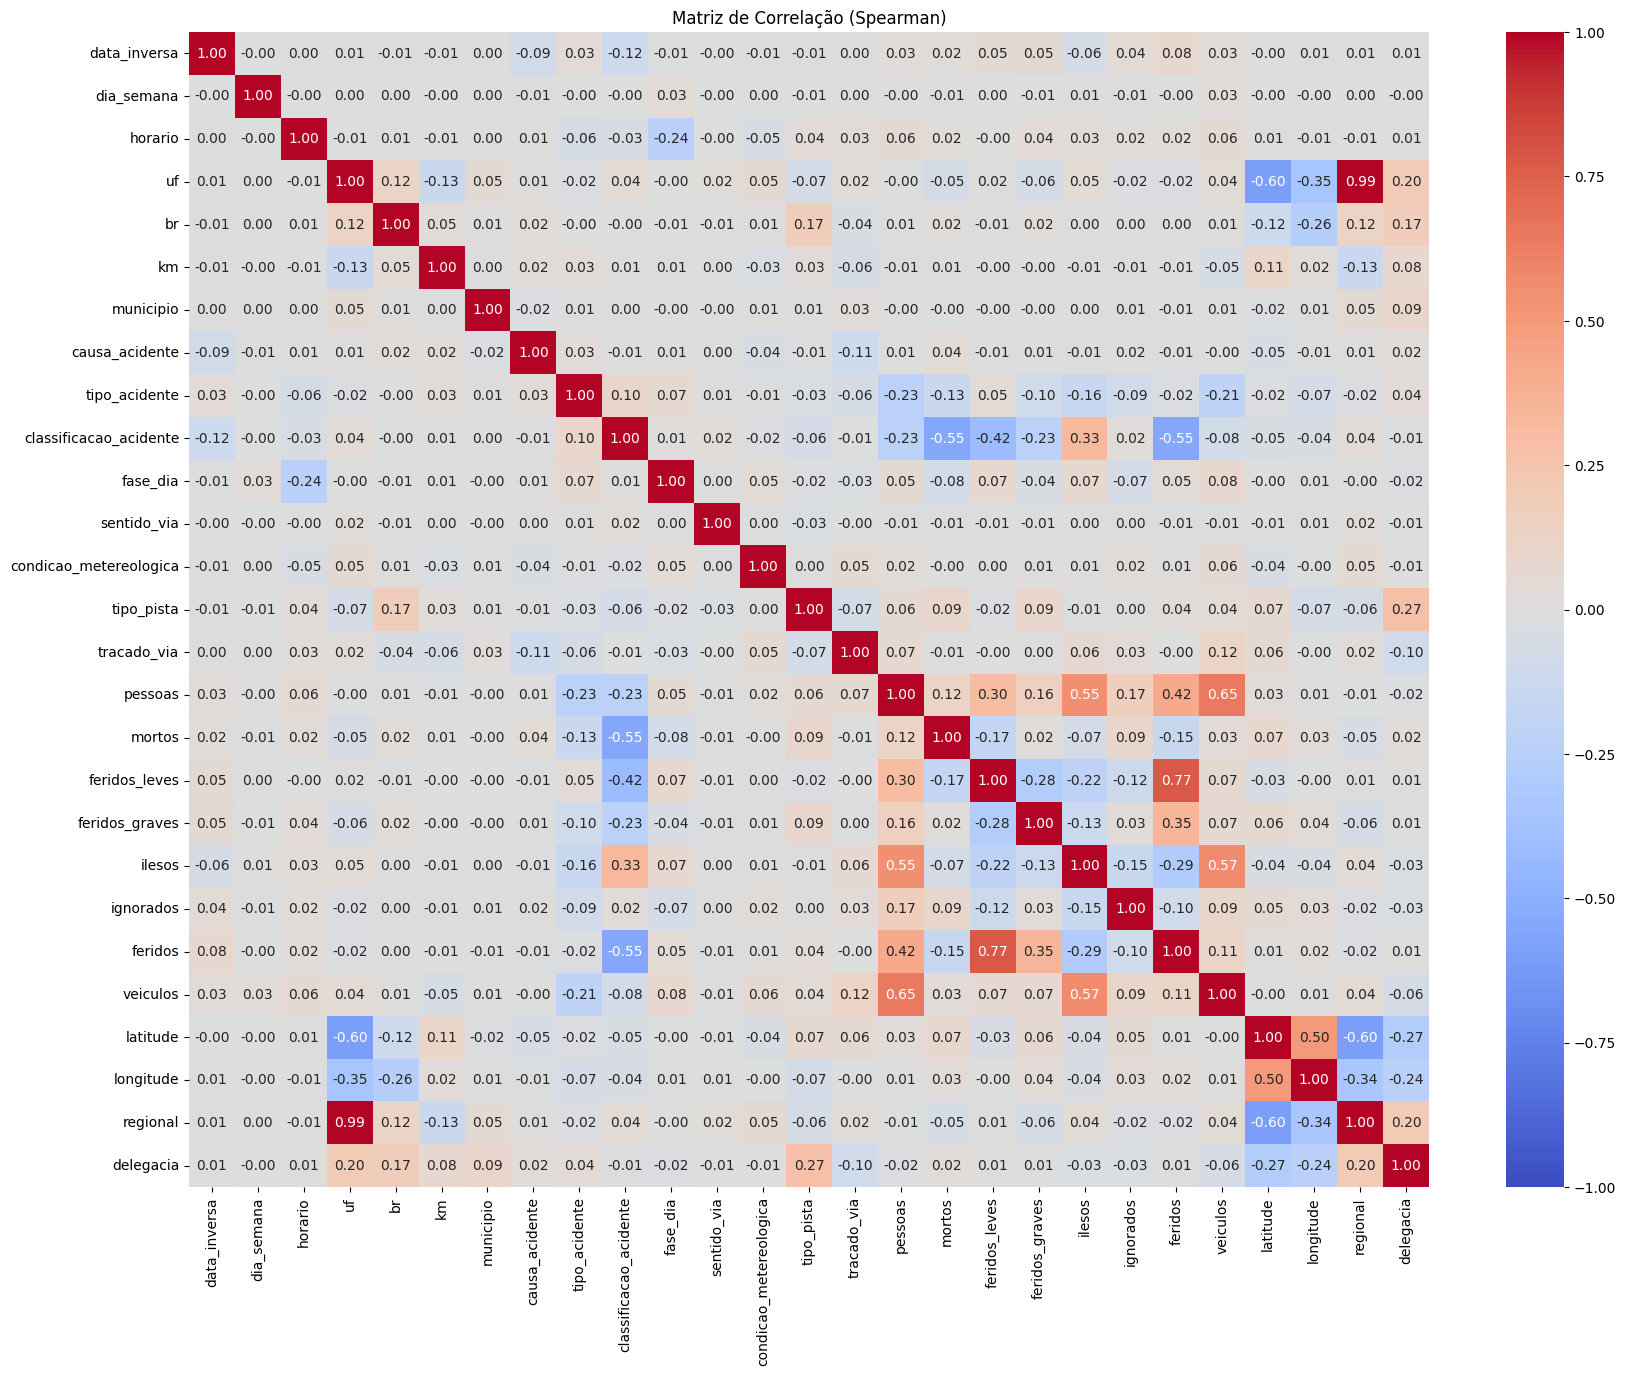

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Agora, vou selecionar apenas as colunas categóricas e strings
cat_cols = data.select_dtypes(include=['object', 'category']).columns

# Codificar automaticamente com o LabelEncoder
label_encoders = {}
data_encoded = data.copy()

# Atribuir valor numérico às colunas selecionadas
for col in cat_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le  # Guarda os encoders para referência

# Criar o heatmap de correlação (Spearman)
plt.figure(figsize=(20, 15))
sns.heatmap(data_encoded.corr(method='spearman'), 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm',
            center=0,
            vmin=-1,
            vmax=1)
plt.title('Matriz de Correlação (Spearman)')
plt.show()

In [4]:
# Sabendo que as BRs 101 e 116 têm (cada uma) mais que o dobro de mortes que as demais BRs, quero identificar padrões nos acidentes.
# Para isso, vou filtrar dados para BR-101 e BR-116
brs_criticas = data[data['br'].isin([101, 116])]

# Agrupar por BR e analisar fatores
fatores = ['tipo_acidente', 'condicao_metereologica', 'fase_dia', 'tipo_pista','veiculos']
for fator in fatores:
    print(f"\nDistribuição de {fator} nas BRs 101 e 116:")
    display(pd.crosstab(brs_criticas['br'], brs_criticas[fator], normalize='index'))


Distribuição de tipo_acidente nas BRs 101 e 116:


tipo_acidente,Atropelamento de Animal,Atropelamento de Pedestre,Capotamento,Colisão com objeto,Colisão com objeto em movimento,Colisão com objeto estático,Colisão frontal,Colisão lateral,Colisão lateral mesmo sentido,Colisão lateral sentido oposto,Colisão transversal,Colisão traseira,Danos eventuais,Derramamento de carga,Engavetamento,Eventos atípicos,Incêndio,Queda de ocupante de veículo,Saída de leito carroçável,Tombamento
br,,,,,,,,,,,,,,,,,,,,
101.0,0.013902,0.051687,0.03299,0.033016,0.003319,0.056364,0.04582,0.091144,0.048107,0.005788,0.119026,0.219224,0.001646,0.002234,0.016841,0.001450,0.013706,0.051844,0.113159,0.078732
116.0,0.012992,0.053845,0.03594,0.037306,0.003793,0.067549,0.04559,0.081908,0.045663,0.007237,0.091282,0.214696,0.001860,0.004069,0.019823,0.002064,0.020070,0.046331,0.119156,0.088826



Distribuição de condicao_metereologica nas BRs 101 e 116:


condicao_metereologica,Chuva,Céu Claro,Garoa/Chuvisco,Granizo,Ignorado,Neve,Nevoeiro/Neblina,Nublado,Sol,Vento
br,,,,,,,,,,
101.0,0.128547,0.539274,0.034413,0.000013,0.010935,0.000013,0.004547,0.201855,0.077907,0.002495
116.0,0.114744,0.531374,0.048333,0.000058,0.012585,0.000015,0.011204,0.213387,0.067065,0.001235



Distribuição de fase_dia nas BRs 101 e 116:


fase_dia,Amanhecer,Anoitecer,Plena Noite,Pleno dia
br,,,,
101.0,0.041207,0.052613,0.346773,0.559407
116.0,0.054727,0.053957,0.363051,0.528265



Distribuição de tipo_pista nas BRs 101 e 116:


tipo_pista,Dupla,Múltipla,Simples
br,,,
101.0,0.512216,0.166762,0.321022
116.0,0.478420,0.149432,0.372148



Distribuição de veiculos nas BRs 101 e 116:


veiculos,1,2,3,4,5,6,7,8,9,10,11,12,14
br,,,,,,,,,,,,,
101.0,0.424549,0.489574,0.064398,0.014816,0.004194,0.001659,0.000405,0.000209,0.000105,0.000039,0.000013,0.000013,0.000026
116.0,0.464484,0.448179,0.065045,0.014648,0.004839,0.001497,0.000872,0.000145,0.000073,0.000116,0.000015,0.000087,0.000000


In [5]:
# Alguns insights obtidos com o resultado:

# 1. 91,33% dos acidentes envolvem ATÉ 2 CARROS.
# 2. 49% das mortes ocorrem em PISTAS DUPLAS, 15% em PISTAS MÚLTIPLAS e 36% em PISTAS SIMPLES.
# 3. 53% das mortes ocorrem em PLENO DIA, 35% em PLENA NOITE.
# 4. 53% das mortes ocorrem sob CÉU CLARO, 11% sob CHUVA.
# 5. 21% das mortes vêm da COLISÃO TRASEIRA, 10% vêm de COLISÃO TRANSVERSAL, 11% vêm da SAÍDA DO LEITO CARROÇÁVEL (saída da pista).

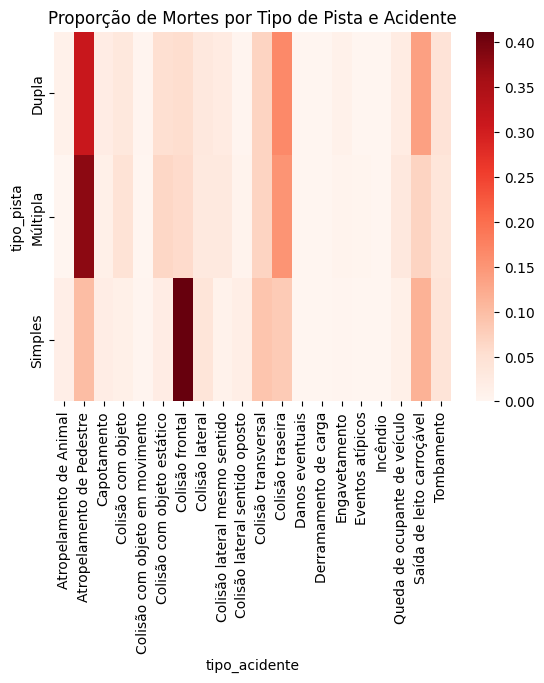

In [6]:
# Agora, quero entender a correlação entre o tipo de acidente e o tipo de pista, para isso, usarei a biblioteca seaborn:
sns.heatmap(
    pd.crosstab(
        data['tipo_pista'], 
        data['tipo_acidente'], 
        values=data['mortos'], 
        aggfunc='sum',
        normalize='index'
    ),
    annot=False,
    fmt=".1%",
    cmap='Reds'
)
plt.title('Proporção de Mortes por Tipo de Pista e Acidente');

In [7]:
# Insights obtidos com o heatmap:

# 1. A COLISÃO FRONTAL tem correlação FORTE com PISTA SIMPLES.
# 2. O ATROPELAMENTO DE PEDESTRE tem correlação FORTE com PISTAS DUPLAS E MÚLTIPLAS, e FRACA com PISTAS SIMPLES.
# 3. A SAÍDA DO LEITO CARROÇÁVEL tem correlação FORTE com PISTAS SIMPLES E DUPLAS, e FRACA com PISTAS MÚLTIPLAS.